In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import os
from pathlib import Path
from sklearn.model_selection import train_test_split
from google.colab import drive
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import IPython.display as ipd
from collections import defaultdict
import statistics
import random

In [66]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
df=pd.read_csv('/content/drive/My Drive/archive/bird_songs_metadata.csv')
df.head()

,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav
3,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-5.wav
4,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-6.wav


In [68]:
df.describe()

,id,latitude,longitude
count,5422.000000,5332.000000,5332.000000
mean,292957.202139,36.938532,-101.548349
std,158950.516002,5.999919,18.099531
min,11713.000000,21.299500,-165.405300
25%,165291.000000,32.545800,-116.461000
50%,321905.000000,35.987000,-106.245900
75%,412669.000000,40.570000,-84.505200
max,565242.000000,64.503500,-68.375000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5422 entries, 0 to 5421
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5422 non-null   int64  
 1   genus       5422 non-null   object 
 2   species     5422 non-null   object 
 3   subspecies  1546 non-null   object 
 4   name        5422 non-null   object 
 5   recordist   5422 non-null   object 
 6   country     5422 non-null   object 
 7   location    5422 non-null   object 
 8   latitude    5332 non-null   float64
 9   longitude   5332 non-null   float64
 10  altitude    5380 non-null   object 
 11  sound_type  5422 non-null   object 
 12  source_url  5422 non-null   object 
 13  license     5422 non-null   object 
 14  time        5422 non-null   object 
 15  date        5422 non-null   object 
 16  remarks     3563 non-null   object 
 17  filename    5422 non-null   object 
dtypes: float64(2), int64(1), object(15)
memory usage: 762.6+ KB


In [70]:
df = df.drop(['subspecies', 'remarks'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5422 entries, 0 to 5421
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5422 non-null   int64  
 1   genus       5422 non-null   object 
 2   species     5422 non-null   object 
 3   name        5422 non-null   object 
 4   recordist   5422 non-null   object 
 5   country     5422 non-null   object 
 6   location    5422 non-null   object 
 7   latitude    5332 non-null   float64
 8   longitude   5332 non-null   float64
 9   altitude    5380 non-null   object 
 10  sound_type  5422 non-null   object 
 11  source_url  5422 non-null   object 
 12  license     5422 non-null   object 
 13  time        5422 non-null   object 
 14  date        5422 non-null   object 
 15  filename    5422 non-null   object 
dtypes: float64(2), int64(1), object(13)
memory usage: 677.9+ KB


In [71]:
df=df.dropna(subset=['latitude', 'longitude', 'altitude'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 0 to 5421
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5290 non-null   int64  
 1   genus       5290 non-null   object 
 2   species     5290 non-null   object 
 3   name        5290 non-null   object 
 4   recordist   5290 non-null   object 
 5   country     5290 non-null   object 
 6   location    5290 non-null   object 
 7   latitude    5290 non-null   float64
 8   longitude   5290 non-null   float64
 9   altitude    5290 non-null   object 
 10  sound_type  5290 non-null   object 
 11  source_url  5290 non-null   object 
 12  license     5290 non-null   object 
 13  time        5290 non-null   object 
 14  date        5290 non-null   object 
 15  filename    5290 non-null   object 
dtypes: float64(2), int64(1), object(13)
memory usage: 702.6+ KB


In [72]:
df.describe()

,id,latitude,longitude
count,5290.000000,5290.000000,5290.000000
mean,293787.980907,36.961480,-101.557385
std,159141.753306,6.015832,18.159367
min,11713.000000,21.299500,-165.405300
25%,165291.000000,32.545800,-116.461000
50%,321914.000000,35.987000,-106.455400
75%,412669.000000,40.587400,-84.421900
max,565242.000000,64.503500,-68.375000


In [73]:
df['species'].unique()

array(['bewickii', 'polyglottos', 'migratorius', 'melodia', 'cardinalis'],
      dtype=object)

In [74]:
df['location'].nunique()

295

In [75]:
df['genus'].unique()

array(['Thryomanes', 'Mimus', 'Turdus', 'Melospiza', 'Cardinalis'],
      dtype=object)

In [76]:
# Create a horizontal bar plot using Plotly
fig = go.Figure(go.Bar(
    x=df['species'].value_counts().sort_values(),
    y=df['species'].value_counts().sort_values().index,
    orientation='h',
    marker=dict(color='#3780BF')
))

fig.update_layout(title='Species Distribution', xaxis_title='Count', yaxis_title='Species')

fig.show()

In [77]:
fig = go.Figure(go.Bar(
    x=df['sound_type'].value_counts().sort_values(),
    y=df['sound_type'].value_counts().sort_values().index,
    orientation='h',
    marker=dict(color='#3780BF')
))

fig.update_layout(title='Sound Type Distribution', xaxis_title='Count', yaxis_title='Sound Type')

fig.show()


In [78]:
fig = go.Figure(go.Bar(
    x=df['location'].value_counts().sort_values(),
    y=df['location'].value_counts().sort_values().index,
    orientation='h',
    marker=dict(color='#3780BF')
))

fig.update_layout(title='Location Distribution', xaxis_title='Count', yaxis_title='Location')

fig.show()

In [79]:
# Setup for storing file paths and labels
file_paths = []
labels = []

# Base directory where your wav files are stored
audio_dir = '/content/drive/My Drive/archive/wavfiles/'

# Assuming 'metadata' is a DataFrame with 'filename' and 'species' columns
for index, row in df.iterrows():
    # Construct the full file path
    file_path = os.path.join(audio_dir, row['filename'])

    # Check if the file exists
    if os.path.exists(file_path):
        file_paths.append(file_path)
        labels.append(row['species'])

# Display the first 5 file paths and labels to verify
file_paths[:5], labels[:5]


(['/content/drive/My Drive/archive/wavfiles/557838-0.wav',
  '/content/drive/My Drive/archive/wavfiles/557838-1.wav',
  '/content/drive/My Drive/archive/wavfiles/557838-4.wav',
  '/content/drive/My Drive/archive/wavfiles/557838-5.wav',
  '/content/drive/My Drive/archive/wavfiles/557838-6.wav'],
 ['bewickii', 'bewickii', 'bewickii', 'bewickii', 'bewickii'])

In [80]:
# Dictionary to store all occurrences of each species
all_occurrences = defaultdict(list)

# Iterate over the file paths and corresponding labels
for file_path, label in zip(file_paths, labels):
    # Append the file path to the list of paths for this species
    all_occurrences[label].append(file_path)

In [81]:
# Function to play one random audio file for each species
def play_one_audio_per_species(all_occurrences):
    for label, paths in all_occurrences.items():
        if paths:
            random_file_path = random.choice(paths)
            y, sr = librosa.load(random_file_path, sr=None)
            print(f"Playing random audio for {label}: {random_file_path}")
            display(ipd.Audio(data=y, rate=sr))
        else:
            print(f"No audio files available for {label}")

play_one_audio_per_species(all_occurrences)


Playing random audio for bewickii: /content/drive/My Drive/archive/wavfiles/351082-9.wav


Playing random audio for polyglottos: /content/drive/My Drive/archive/wavfiles/499260-8.wav


Playing random audio for migratorius: /content/drive/My Drive/archive/wavfiles/175222-11.wav


Playing random audio for melodia: /content/drive/My Drive/archive/wavfiles/185605-4.wav


Playing random audio for cardinalis: /content/drive/My Drive/archive/wavfiles/165346-4.wav


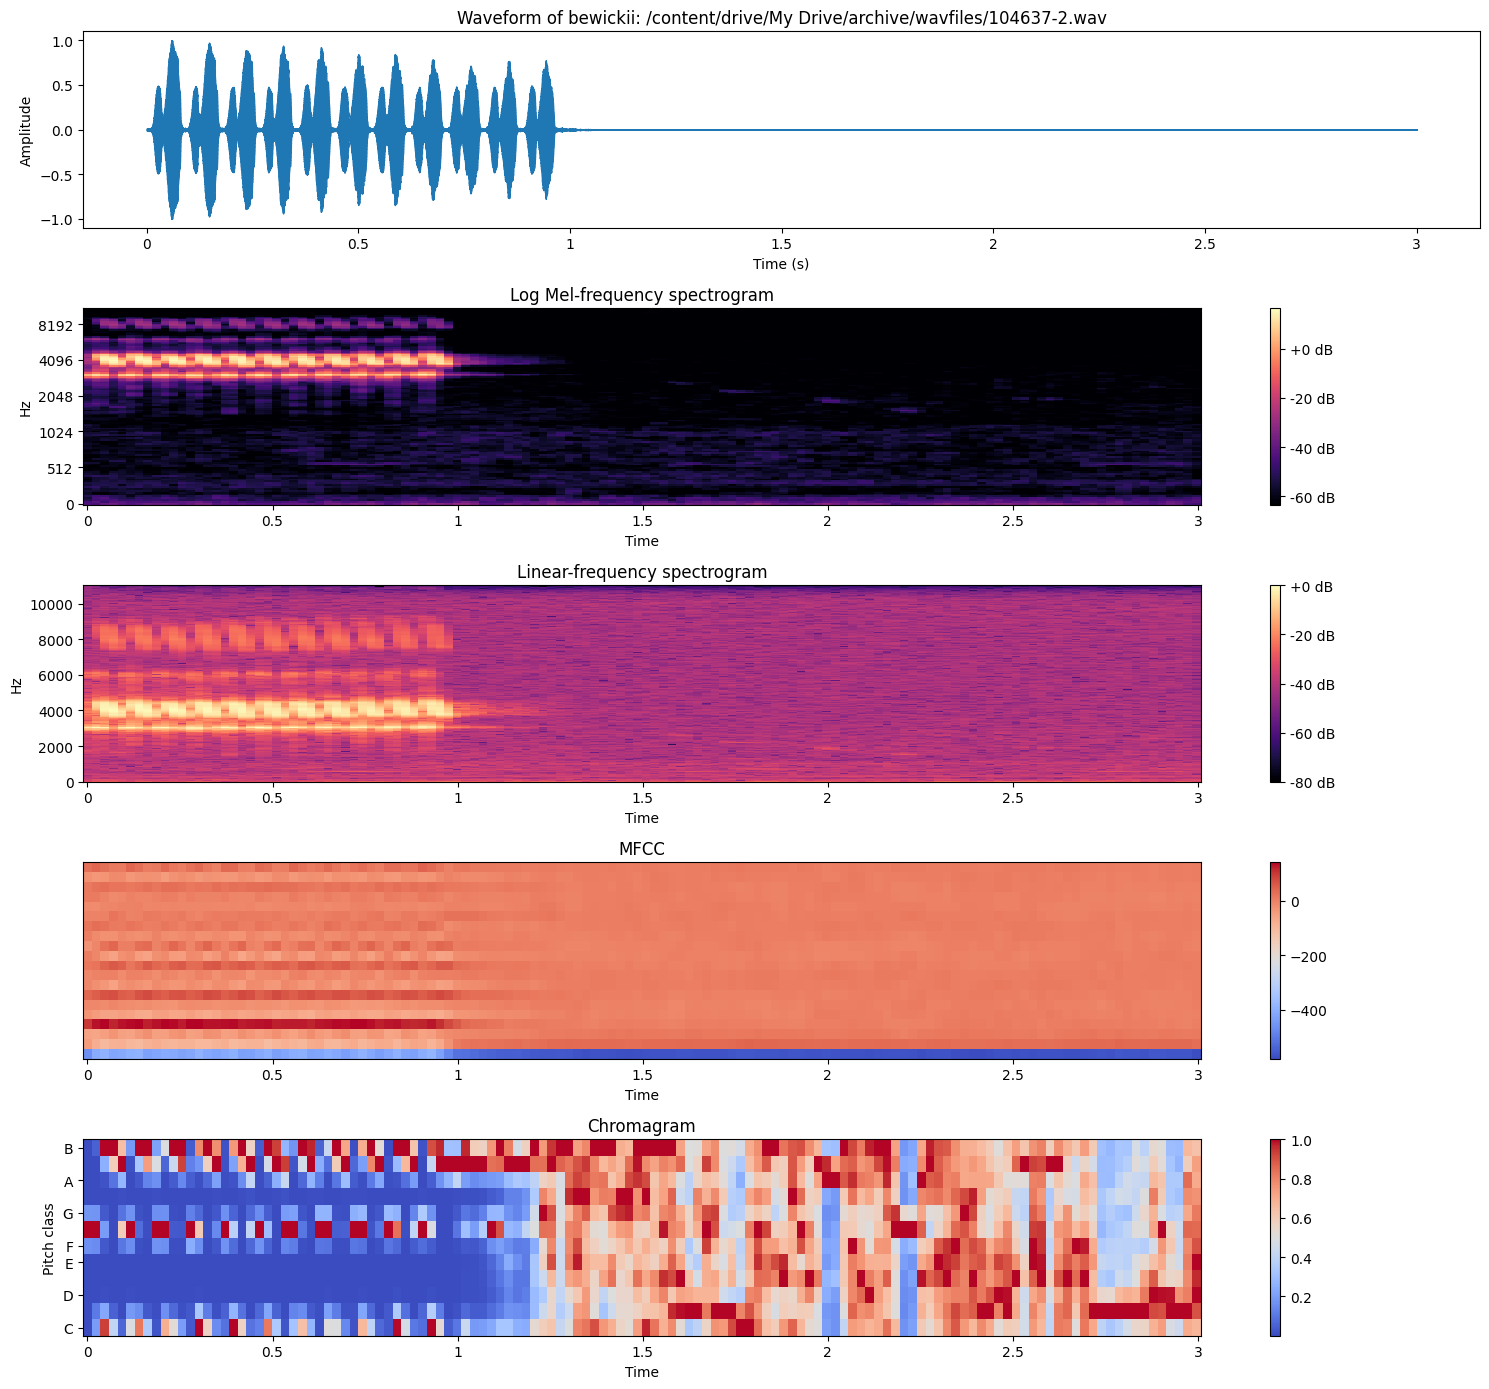

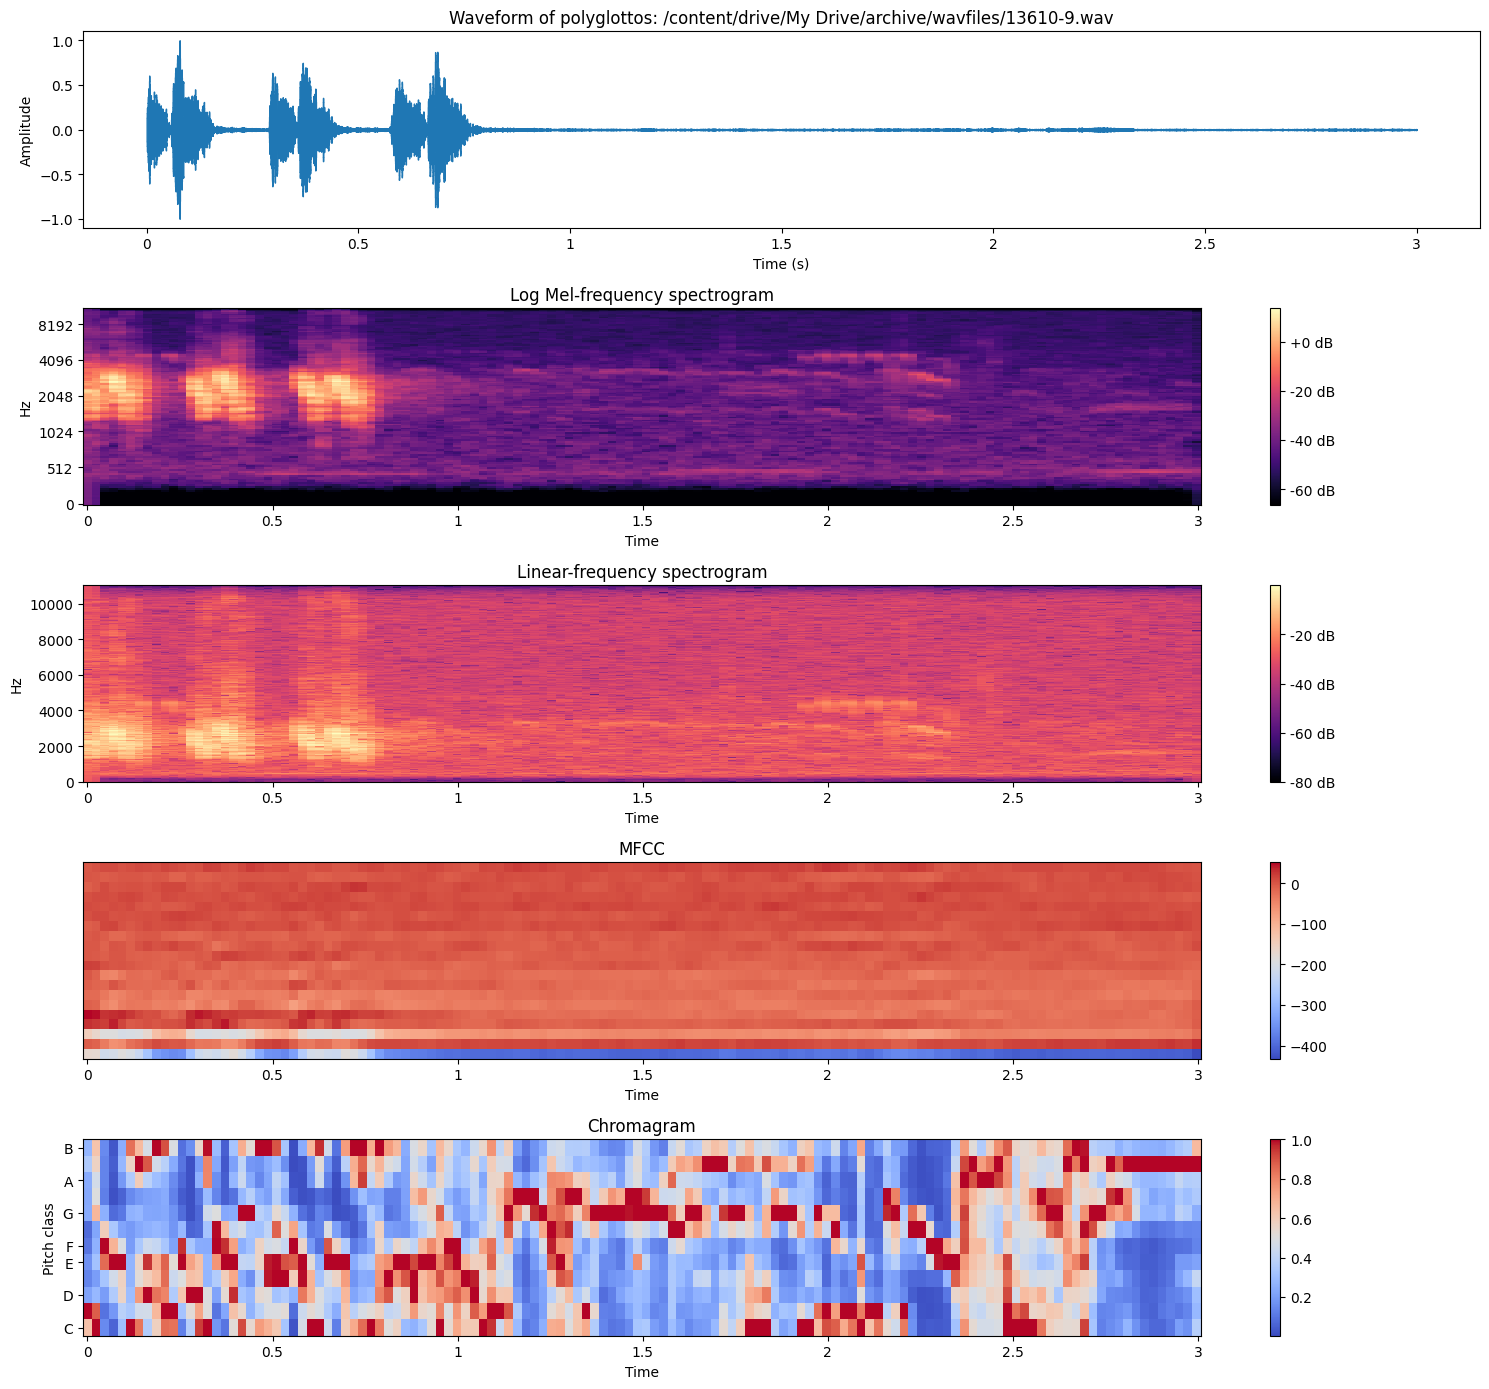

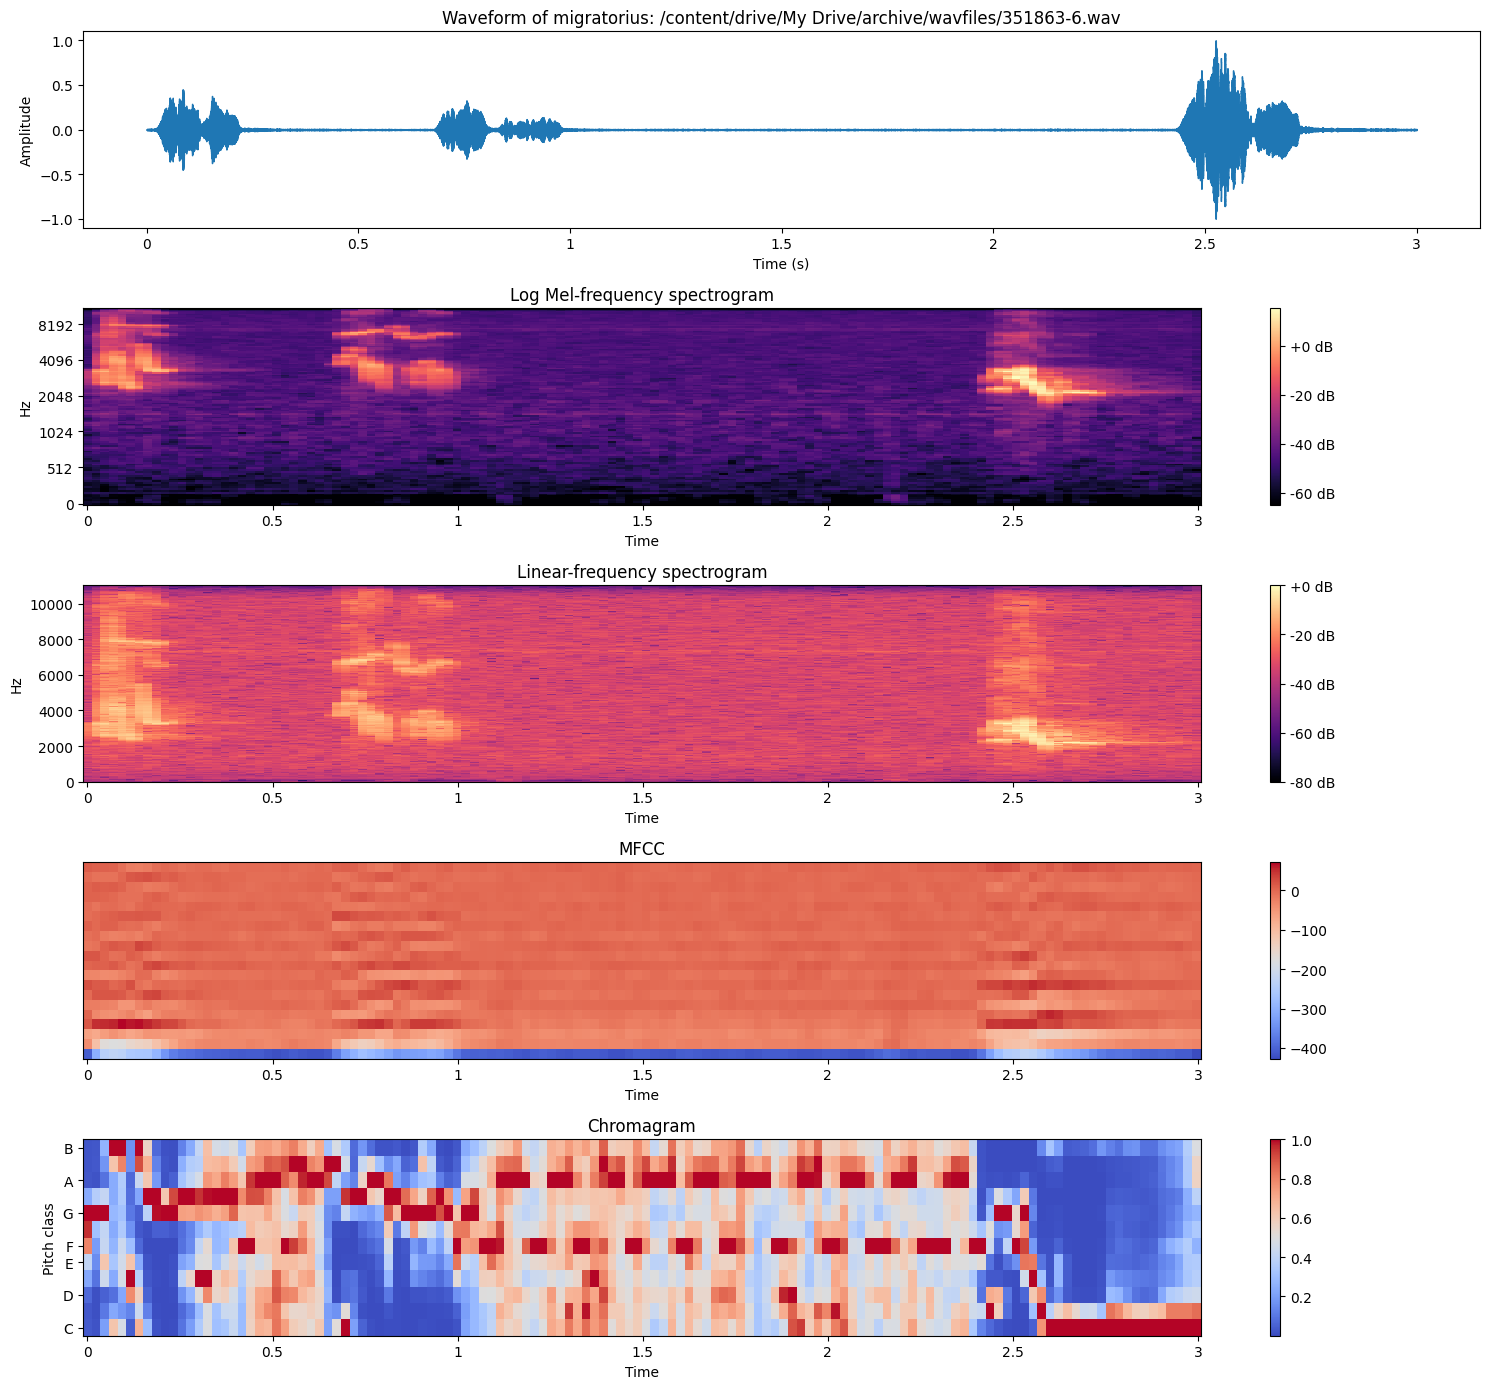

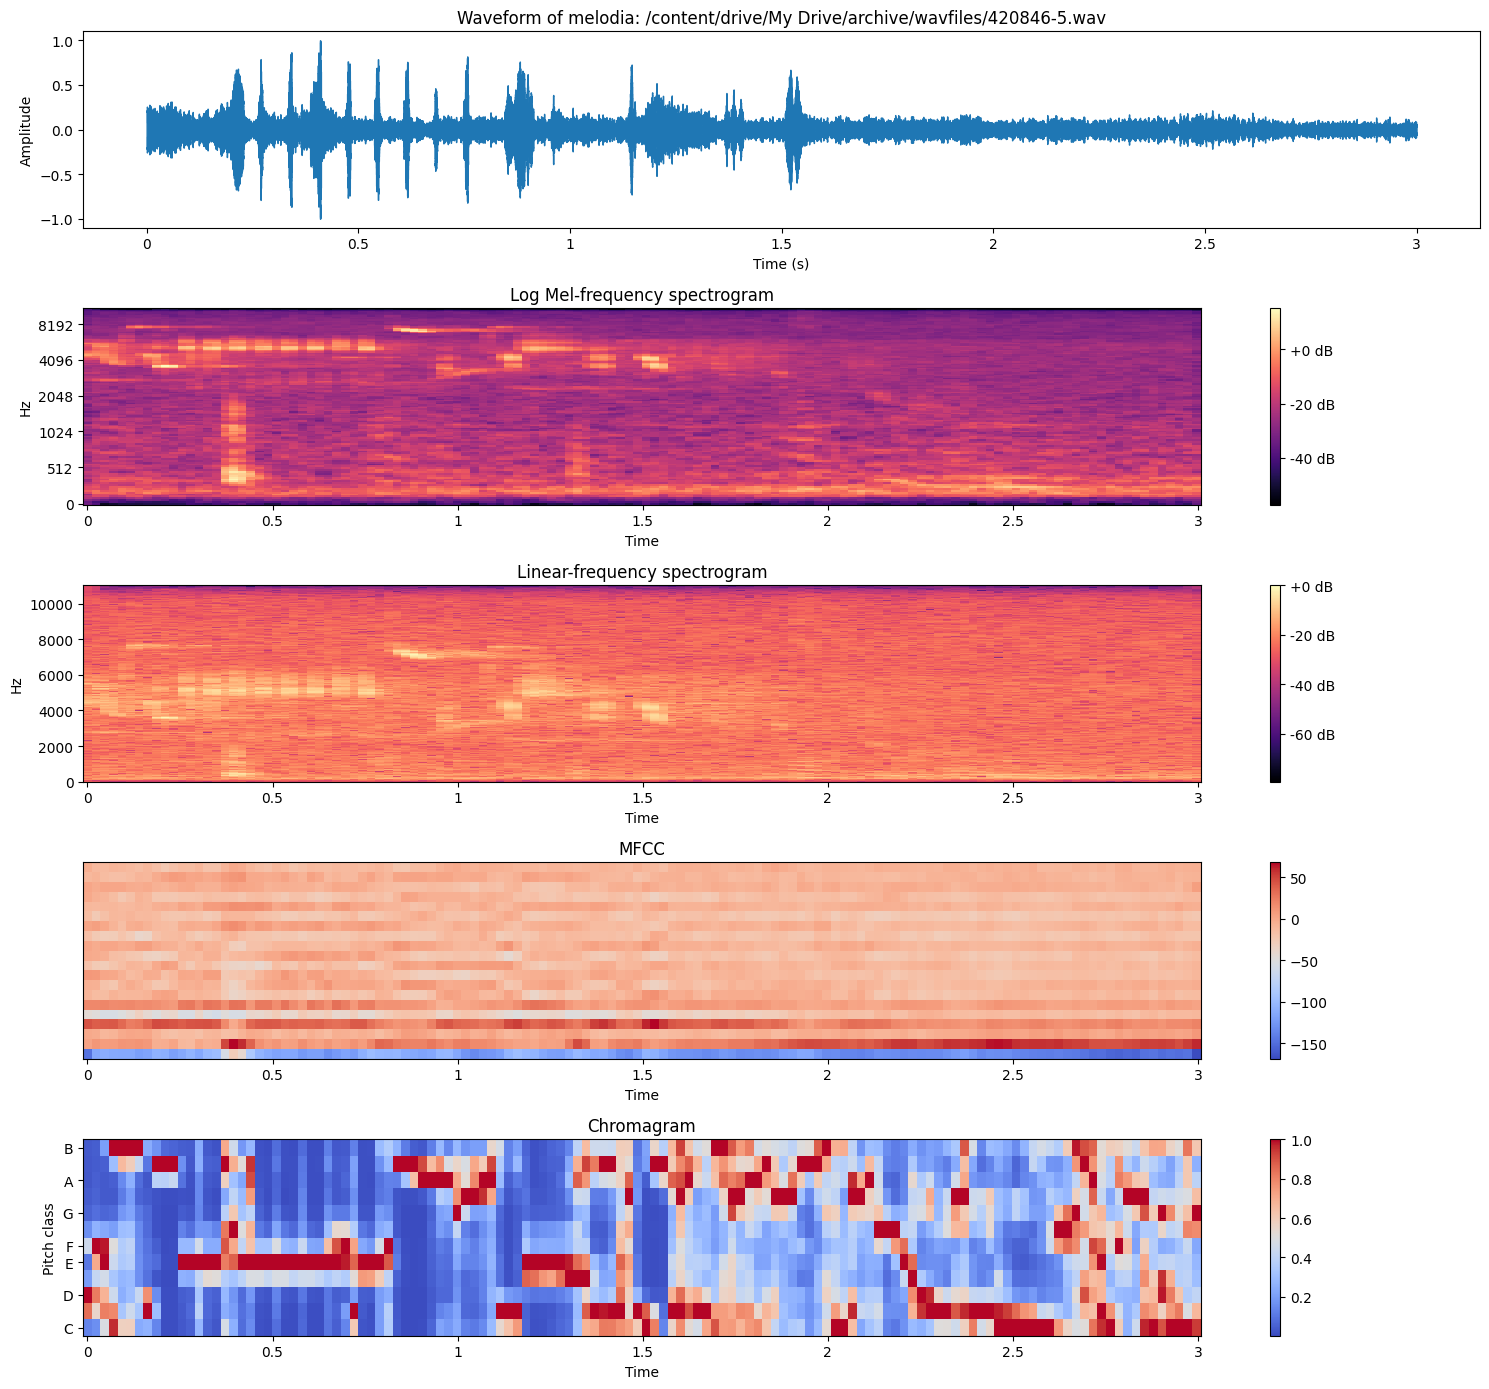

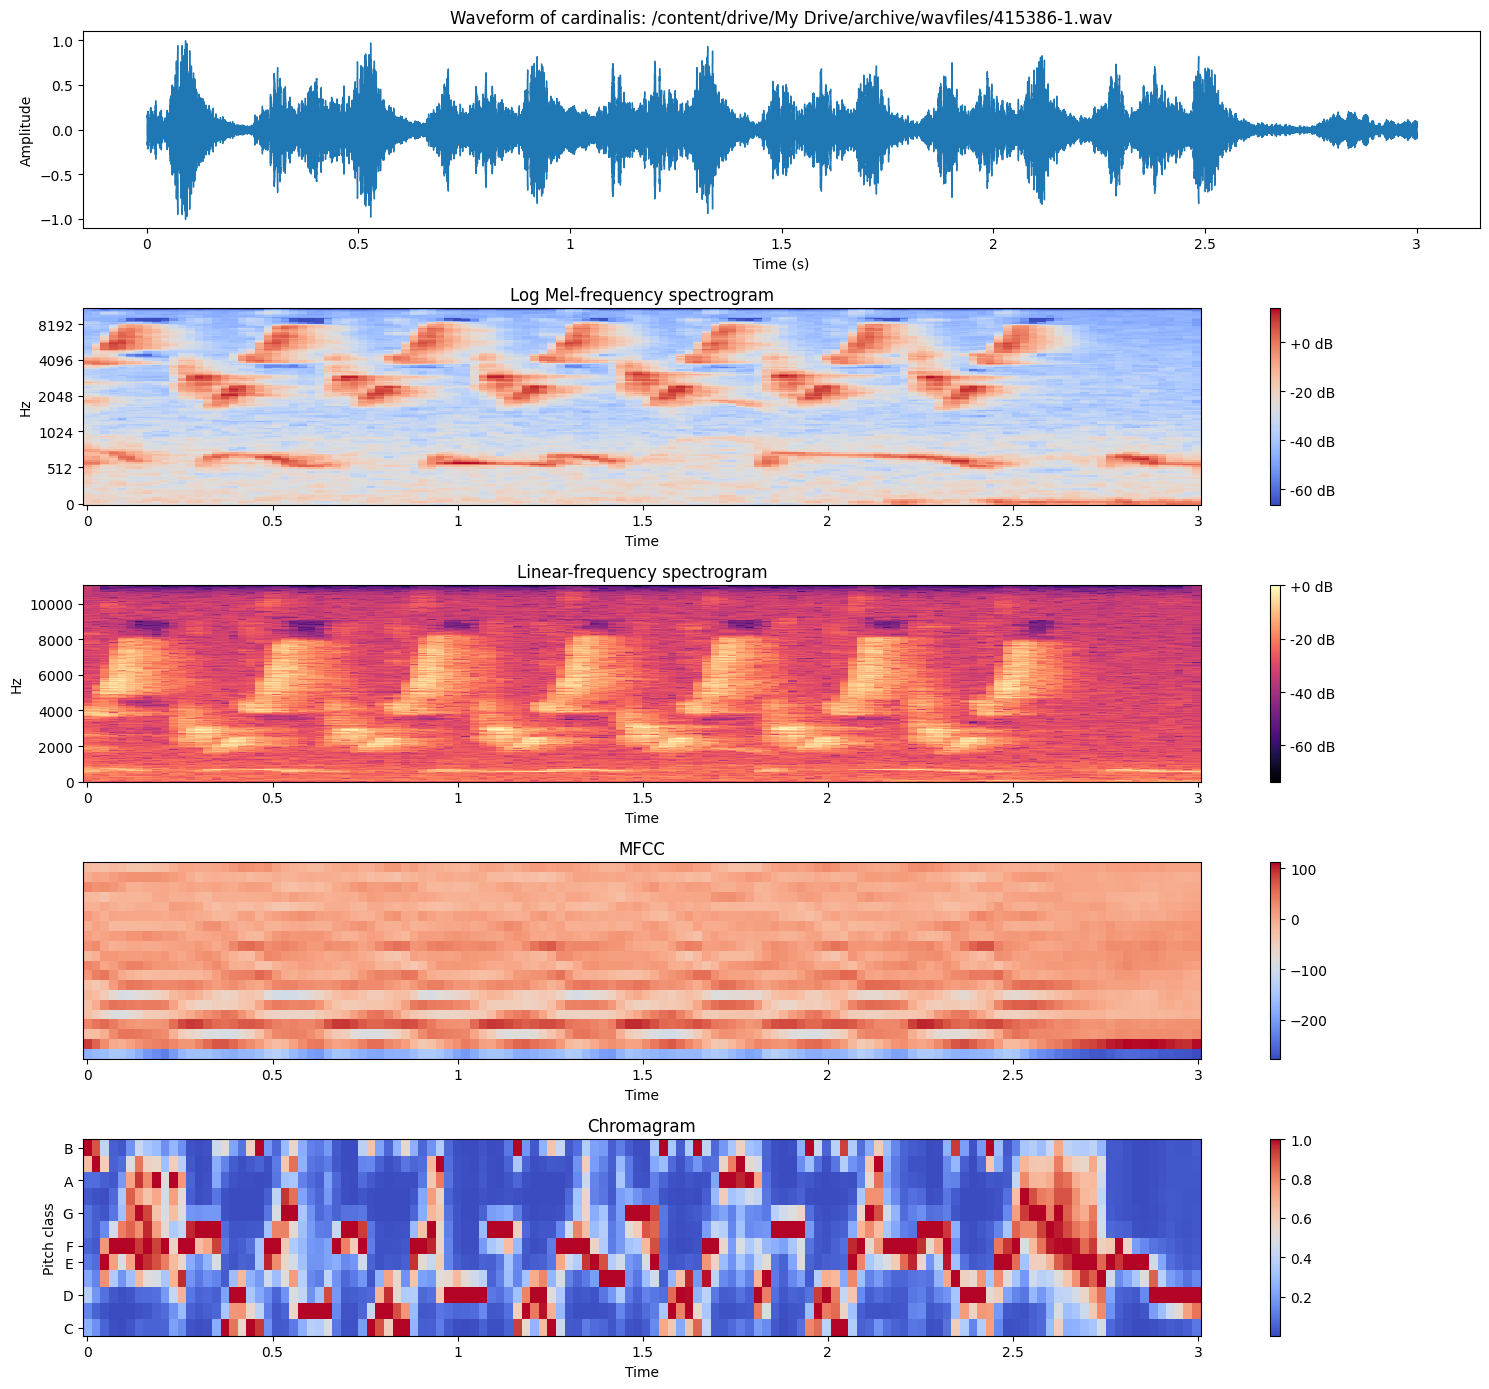

In [82]:
# Function to plot audio data including waveform, linear spectrogram, MFCC, log Mel spectrogram, and Chromagram
def plot_audio_data(all_occurrences):
    for label, paths in all_occurrences.items():
        if paths:
            random_file_path = random.choice(paths)
            y, sr = librosa.load(random_file_path, sr=None)

            # Prepare plots
            plt.figure(figsize=(15, 14))

            # Plot waveform
            plt.subplot(5, 1, 1)
            librosa.display.waveshow(y, sr=sr)
            plt.title(f"Waveform of {label}: {random_file_path}")
            plt.xlabel('Time (s)')
            plt.ylabel('Amplitude')

            # Plot Log Mel-frequency spectrogram
            plt.subplot(5, 1, 2)
            S_log_mel = librosa.feature.melspectrogram(y=y, sr=sr, power=1)
            log_S = librosa.amplitude_to_db(S_log_mel)
            librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
            plt.colorbar(format='%+2.0f dB')
            plt.title('Log Mel-frequency spectrogram')

            # Plot linear-frequency spectrogram
            plt.subplot(5, 1, 3)
            D = np.abs(librosa.stft(y))
            S_dB_lin = librosa.power_to_db(D, ref=np.max)
            librosa.display.specshow(S_dB_lin, sr=sr, x_axis='time', y_axis='linear')
            plt.colorbar(format='%+2.0f dB')
            plt.title('Linear-frequency spectrogram')

            # Plot MFCCs
            plt.subplot(5, 1, 4)
            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
            librosa.display.specshow(mfccs, sr=sr, x_axis='time')
            plt.colorbar()
            plt.title('MFCC')

            # Plot Chromagram
            plt.subplot(5, 1, 5)
            C = librosa.feature.chroma_stft(y=y, sr=sr)
            librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
            plt.colorbar()
            plt.title('Chromagram')

            plt.tight_layout()
            plt.show()

        else:
            print(f"No audio files available for {label}")

plot_audio_data(all_occurrences)
